### Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


### Load the data

In [61]:
# Load the dataset
#data1 = pd.read_csv('/Users/sakshiii/Desktop/Intro_to_python/statistics/MELBOURNE_HOUSE_PRICES_LESS.csv')
df = pd.read_csv('/Users/sakshiii/Desktop/Intro_to_python/statistics/Melbourne_housing_FULL.csv')

In [62]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [106]:
df.groupby(['Suburb','Address']).sum('Rooms').sort_values(by='Rooms', ascending=False)

,,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,...,TotalRooms,BuildingAreaPerRoom,PricePerSqMeter,DistanceCategory,SaleYear,SaleMonth,SaleSeason,SuburbMedianPrice,SuburbMedianAge,SuburbSizeCategory
Suburb,Address,,,,,,,,,,,,,,,,,,,,,
0.486110,-0.393174,13.623806,-0.652474,5000000.0,-0.386339,-1.230043,0.872191,0.163808,15.529544,9.892005,7.145662,...,15.161702,-0.032497,-0.041267,1.086954,0.252724,0.901982,-0.405950,-0.072247,0.161727,0.045083
-0.100544,-1.461800,9.434350,-0.652474,4700000.0,-1.249667,0.727574,-0.984239,0.073827,-0.042291,-0.682320,0.245357,...,5.237747,-0.032497,-0.041267,-1.424670,0.252724,-0.683525,-1.310063,-0.703041,0.161727,1.231916
0.405192,-0.301174,9.434350,-0.652474,710000.0,-0.386339,0.566949,3.008558,2.008399,10.738210,5.360152,1.395408,...,10.491606,-0.480258,-0.162783,2.761370,0.252724,1.219083,-0.405950,-1.677774,0.161727,-1.141751
0.799667,1.578608,7.339621,-0.652474,2800000.0,2.203647,0.356129,-1.278910,-0.556033,-0.042291,-0.682320,0.245357,...,4.070223,-0.032497,-0.041267,-1.424670,-1.319417,-1.000626,-1.310063,0.765481,0.161727,-1.141751
-1.172705,0.831852,7.339621,-0.652474,900000.0,-1.249667,0.848043,0.120779,-0.277095,8.342543,2.338916,0.245357,...,8.156557,-0.032497,-0.041267,0.249746,0.252724,-0.049322,1.402277,-0.650237,0.161727,1.231916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.838919,1.156314,-4.173312,3.537863,730000.0,2.680638,-0.572742,-2.734623,-0.860122,-4.875917,-1.364640,-4.109489,...,-4.702319,-0.021048,-0.033983,-2.849340,0.505449,-0.098644,2.804553,-0.495569,0.323454,-2.283501
-1.051328,0.214026,-4.173312,3.537863,595000.0,-0.772677,2.428937,0.035288,0.885492,-4.875917,-1.364640,-1.809387,...,-4.702319,0.047484,-0.139519,0.499492,-1.066693,-1.367049,0.092213,-1.023609,0.323454,0.090166
0.142209,-1.356842,-4.173312,3.537863,624000.0,2.680638,-1.576648,-2.086346,-1.489983,-0.084583,-1.364640,0.490714,...,-2.367271,-0.064995,-0.082534,-2.849340,-2.638834,0.535559,2.804553,-1.050725,0.323454,0.090166


In [107]:
df.index

Index([    1,     2,     4,     5,     6,    10,    11,    14,    15,    16,
       ...
       34846, 34847, 34848, 34849, 34851, 34852, 34853, 34854, 34855, 34856],
      dtype='int64', length=27247)

In [64]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Data Cleaning

In [65]:
# Drop rows where the target 'Price' is missing
df = df.dropna(subset=['Price'])

# Handling missing values for propertyCount
pcount_suburb = df.groupby('Suburb')['Propertycount'].transform('median')
df['Propertycount'].fillna(pcount_suburb, inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/1059565915.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Propertycount'].fillna(pcount_suburb, inplace=True)


In [66]:
df['Distance'].fillna(df['Distance'].median(), inplace=True)

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/4107826561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance'].fillna(df['Distance'].median(), inplace=True)


In [67]:
df['Postcode'].fillna(df['Postcode'].median(), inplace=True)

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/4154705057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postcode'].fillna(df['Postcode'].median(), inplace=True)


In [68]:
# Fill missing 'Bedroom2' with the median number of bedrooms in each 'Suburb'
df['Bedroom2'].fillna(df['Bedroom2'].median(), inplace=True)

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/2594557792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedroom2'].fillna(df['Bedroom2'].median(), inplace=True)


In [69]:
df['Bathroom'].fillna(df['Bathroom'].median(), inplace=True)

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/29812399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bathroom'].fillna(df['Bathroom'].median(), inplace=True)


In [70]:
df['Car'].fillna(df['Car'].median(), inplace=True)

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/1624329317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Car'].fillna(df['Car'].median(), inplace=True)


In [71]:
# Fill missing 'Landsize' with the median land size for each 'Suburb'
suburb_landsize_median = df.groupby('Suburb')['Landsize'].transform('median')
df['suburb_landsize_median'].fillna(suburb_landsize_median, inplace=True)

# For any remaining missing 'Landsize', fill with the median for each 'Regionname'
region_landsize_median = df.groupby('Regionname')['Landsize'].transform('median')
df['region_landsize_median'].fillna(region_landsize_median, inplace=True)

# Fill remaining missing 'Landsize' with the overall median
df['Landsize'].fillna(df['Landsize'].median(), inplace=True)


KeyError: 'suburb_landsize_median'

In [72]:
# Step 1: Fill missing 'BuildingArea' with the median building area for each 'Suburb' and 'Type'
suburb_type_buildingarea_median = df.groupby(['Suburb', 'Type'])['BuildingArea'].transform('median')
df['suburb_type_buildingarea_median'].fillna(suburb_type_buildingarea_median, inplace=True)

# Step 2: For any remaining missing 'BuildingArea', fill with the median for each 'Suburb'
suburb_buildingarea_median = df.groupby('Suburb')['BuildingArea'].transform('median')
df['suburb_buildingarea_median'].fillna(suburb_buildingarea_median, inplace=True)

# Step 3: Fill remaining missing 'BuildingArea' with the overall median
df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=True)


KeyError: 'suburb_type_buildingarea_median'

In [73]:
# Step 1: Impute by suburb median
suburb_yearbuilt_median = df.groupby('Suburb')['YearBuilt'].transform('median')
df['suburb_yearbuilt_median'].fillna(suburb_yearbuilt_median, inplace=True)

# Step 2: Fallback to region median if still missing
region_yearbuilt_median = df.groupby('Regionname')['YearBuilt'].transform('median')
df['region_yearbuilt_median'].fillna(region_yearbuilt_median, inplace=True)

# Step 3: Fallback to overall median
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)



KeyError: 'suburb_yearbuilt_median'

In [74]:
# Step 1: Fill missing 'CouncilArea' values with the most common council for each 'Suburb'
suburb_council_mode = df.groupby('Suburb')['CouncilArea'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['suburb_council_mode'].fillna(suburb_council_mode, inplace=True)

# Step 2: For any remaining missing values, fill with the overall mode
overall_council_mode = df['CouncilArea'].mode()[0]
df['CouncilArea'].fillna(overall_council_mode, inplace=True)


KeyError: 'suburb_council_mode'

In [57]:
# Step 1: Fill missing 'Lattitude' and 'Longtitude' with median coordinates for each 'Suburb'
suburb_latitude_median = df.groupby('Suburb')['Lattitude'].transform('median')
suburb_longitude_median = df.groupby('Suburb')['Longtitude'].transform('median')
df['suburb_latitude_median'].fillna(suburb_latitude_median, inplace=True)
df['suburb_longitude_median'].fillna(suburb_longitude_median, inplace=True)

# Step 2: For remaining missing values, fill with median for each 'Regionname'
region_latitude_median = df.groupby('Regionname')['Lattitude'].transform('median')
region_longitude_median = df.groupby('Regionname')['Longtitude'].transform('median')
df['region_latitude_median'].fillna(region_latitude_median, inplace=True)
df['region_longitude_median'].fillna(region_longitude_median, inplace=True)

# Step 3: Fill any remaining missing values with overall median
df['Lattitude'].fillna(df['Lattitude'].median(), inplace=True)
df['Longtitude'].fillna(df['Longtitude'].median(), inplace=True)


KeyError: 'suburb_latitude_median'

In [75]:
# Step 1: Fill missing 'Regionname' values based on the most common region for each 'Suburb'
suburb_region_mode = df.groupby('Suburb')['Regionname'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['suburb_region_mode'].fillna(suburb_region_mode, inplace=True)

# Step 2: For any remaining missing 'Regionname', fill with the overall mode
overall_region_mode = df['Regionname'].mode()[0]
df['Regionname'].fillna(overall_region_mode, inplace=True)


KeyError: 'suburb_region_mode'

In [76]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        1
dtype: int64

### EDA

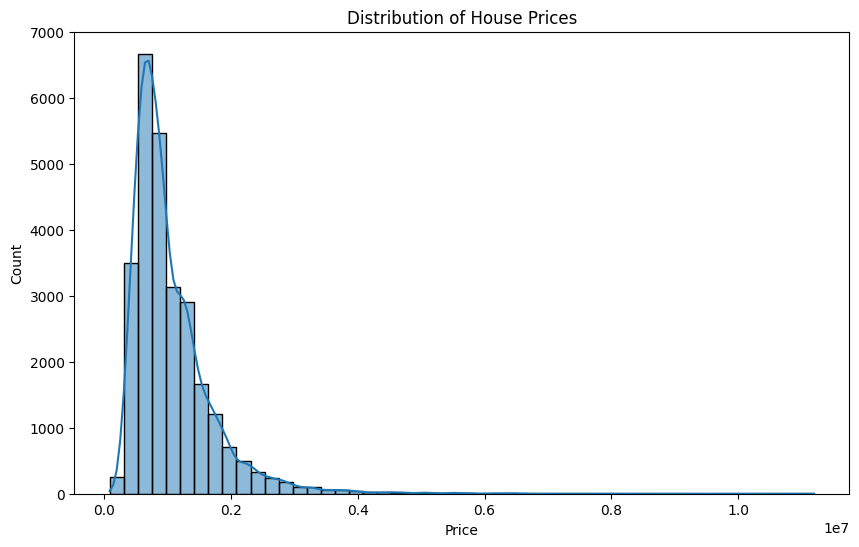

In [77]:
# Plot the distribution of the target variable 'Price'
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()


### Feature Engineering

#### 12. Log Transformations for Skewed Features

In [78]:
# Apply log transformation to skewed features
df['LogPrice'] = np.log1p(df['Price'])
df['LogBuildingArea'] = np.log1p(df['BuildingArea'])
df['LogLandSize'] = np.log1p(df['Landsize'])


#### 1. Age of Property

In [79]:
# Current year
current_year = pd.Timestamp('today')
df['PropertyAge'] = current_year.year - df['YearBuilt']

# Fill missing values with a placeholder (e.g., median age or a large number if unknown)
df['PropertyAge'].fillna(df['PropertyAge'].median(), inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/130786444.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PropertyAge'].fillna(df['PropertyAge'].median(), inplace=True)


#### 2. Total Rooms (Living Area)

In [80]:
# Summing bedrooms and other rooms to get total rooms
df['TotalRooms'] = df['Rooms'] + df['Bedroom2']

# Fill missing values in TotalRooms if needed
df['TotalRooms'].fillna(df['TotalRooms'].median(), inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/2577507106.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalRooms'].fillna(df['TotalRooms'].median(), inplace=True)


#### 3. Building Area per Room

In [81]:
df['BuildingAreaPerRoom'] = df['BuildingArea'] / df['TotalRooms']
df['BuildingAreaPerRoom'].fillna(df['BuildingAreaPerRoom'].median(), inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/2118638648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BuildingAreaPerRoom'].fillna(df['BuildingAreaPerRoom'].median(), inplace=True)


#### 4. Price per Square Meter

In [82]:
df['PricePerSqMeter'] = df['Price'] / df['BuildingArea']
df['PricePerSqMeter'].fillna(df['PricePerSqMeter'].median(), inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/1415847325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PricePerSqMeter'].fillna(df['PricePerSqMeter'].median(), inplace=True)


# ------------------------------------------------------------------

#### 5. Distance Bins

In [83]:
# Define bins for distance
bins = [0, 5, 10, 15, 20, 30, df['Distance'].max()]
labels = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far', 'Remote']
df['DistanceCategory'] = pd.cut(df['Distance'], bins=bins, labels=labels)

# Convert DistanceCategory to numerical encoding if necessary
df['DistanceCategory'] = df['DistanceCategory'].cat.codes


#### 6. Latitude and Longitude Clusters

In [84]:
from sklearn.cluster import KMeans

# Define the number of clusters (e.g., 10 based on geographic patterns)
kmeans = KMeans(n_clusters=10, random_state=0)
df['LocationCluster'] = kmeans.fit_predict(df[['Lattitude', 'Longtitude']])


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### 7. Sale Year and Month

In [85]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract year and month from Date
df['SaleYear'] = df['Date'].dt.year
df['SaleMonth'] = df['Date'].dt.month


#### 8. Season of Sale

In [86]:
# Define function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to create a new column
df['SaleSeason'] = df['SaleMonth'].apply(get_season)


#### 9. Median Price by Suburb

In [87]:
# Calculate median price per suburb and fill missing prices with the median
suburb_median_price = df.groupby('Suburb')['Price'].transform('median')
df['SuburbMedianPrice'] = suburb_median_price
df['SuburbMedianPrice'].fillna(df['Price'].median(), inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/353166455.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SuburbMedianPrice'].fillna(df['Price'].median(), inplace=True)


#### 10. Median Property Age by Suburb

In [88]:
# Calculate median property age per suburb
suburb_median_age = df.groupby('Suburb')['PropertyAge'].transform('median')
df['SuburbMedianAge'] = suburb_median_age
df['SuburbMedianAge'].fillna(df['SuburbMedianAge'].median(), inplace=True)


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_17487/3502549253.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SuburbMedianAge'].fillna(df['SuburbMedianAge'].median(), inplace=True)


#### 11. Number of Properties per Suburb

In [89]:
# Define bins for property count
bins = [0, 1000, 5000, 10000, 20000, df['Propertycount'].max()]
labels = ['Small', 'Medium', 'Large', 'Very Large', 'Huge']
df['SuburbSizeCategory'] = pd.cut(df['Propertycount'], bins=bins, labels=labels).cat.codes


### Modeling

In [90]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [91]:
# Use Label Encoding for categorical variables to convert them into numerical values
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [92]:
# Select numerical features and handle infinite values
numerical_features = df.drop(columns=['Price']).select_dtypes(include=[np.number])

# Replace infinite values with NaN, then fill NaNs with 0 (or use another strategy if appropriate)
numerical_features = numerical_features.replace([np.inf, -np.inf], np.nan).fillna(0)

# Apply StandardScaler to standardize the cleaned features
scaler = StandardScaler()
df[numerical_features.columns] = scaler.fit_transform(numerical_features)


In [93]:
# df = df[['Rooms', 'Distance', 'Suburb','Postcode', 'Type', 'Car', 'Bathroom', 'CouncilArea', 'Lattitude', 'Longtitude','PropertyAge', 'TotalRooms', 'DistanceCategory', 'SuburbMedianPrice','SellerG' ,'LogBuildingArea', 'LogLandSize', 'Price']]

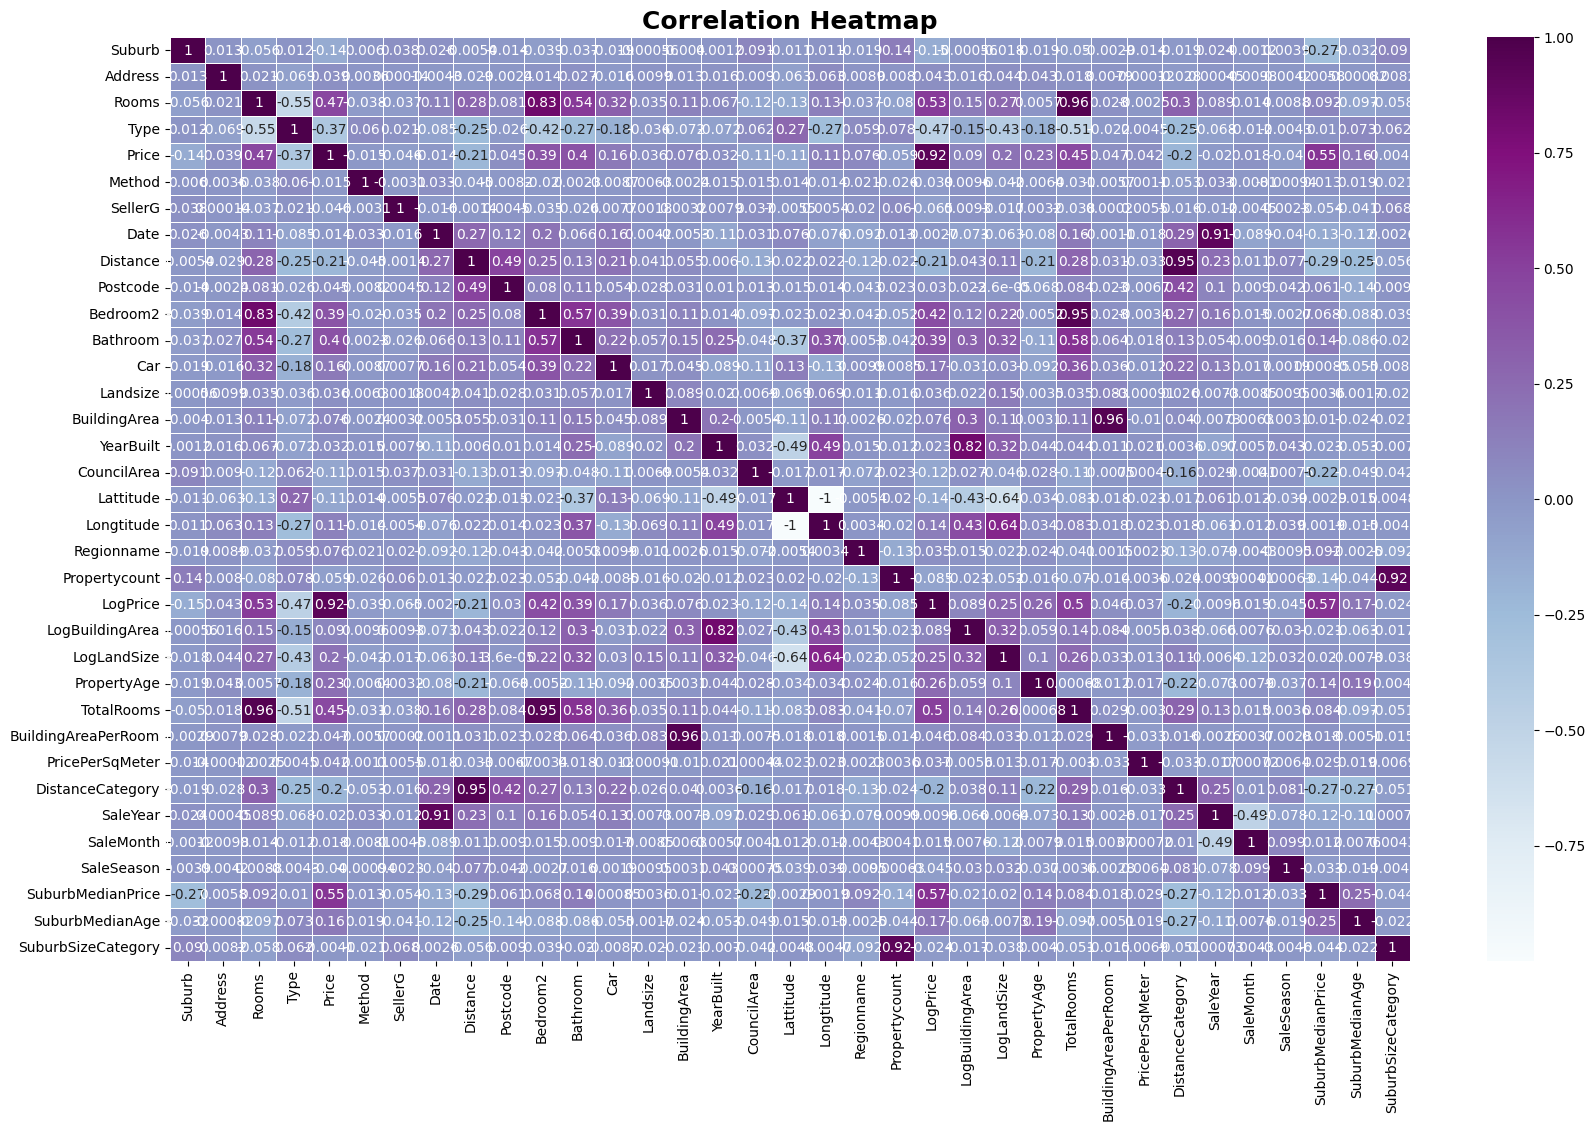

In [94]:
# Correlation heatmap

plt.figure(figsize= (20,12))

sns.heatmap(
    df.corr(),
    annot= True,
    cmap="BuPu",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=18, weight='bold')
plt.show()

In [95]:
# Select relevant features
# Here, we use 'Price' as the dependent variable and 'Rooms', 'Distance', 'BuildingArea' as independent variables
X = df[['Rooms', 'Distance', 'Suburb','Postcode', 'Type', 'Car', 'Bathroom', 'CouncilArea', 'Lattitude', 'Longtitude','PropertyAge', 'TotalRooms', 'DistanceCategory', 'SuburbMedianPrice', 'LogBuildingArea', 'LogLandSize']]
y = df['LogPrice']

In [96]:
# Step 3: Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [97]:
# Step 4: Adding a constant to the model
# In statsmodels, we need to add a constant manually to account for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [98]:
# Step 5: Building the OLS model
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

In [99]:
y_pred = model.predict(X_test)


In [100]:
mae = mean_absolute_error(y_test,y_pred)
print(f'mean_absolute_error : {mae:.2f}')

mean_absolute_error : 0.40


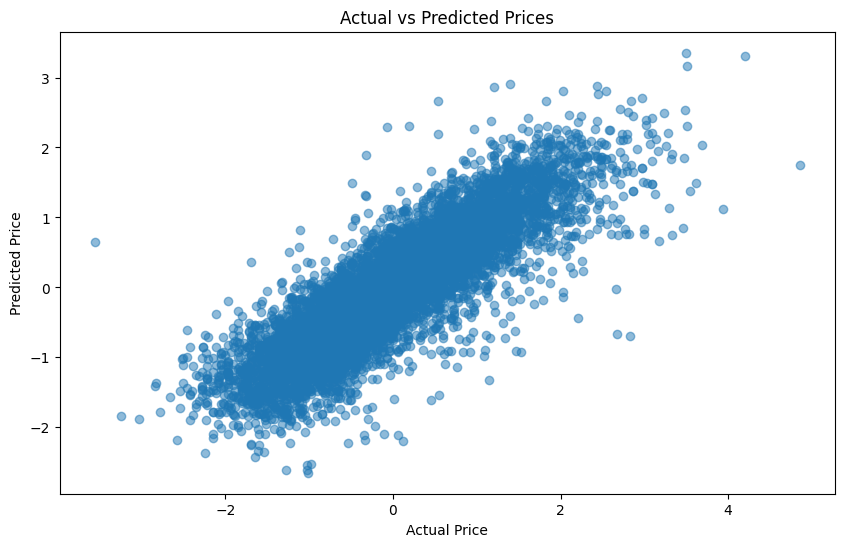

In [75]:
# Visualizing the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

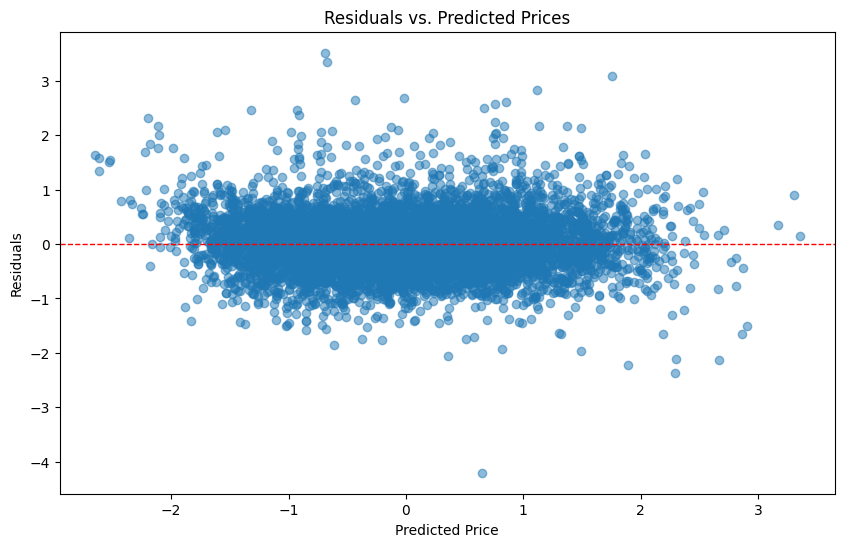

In [76]:

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()
